In [3]:
import pandas as pd
df=pd.read_csv("athlete_events.csv")
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df['Age'].fillna(value=df['Age'].mean(),inplace=True)

In [7]:
df['Height'].fillna(value=df['Height'].mean(),inplace=True)

In [8]:
df['Weight'].fillna(value=df['Weight'].mean(),inplace=True)

In [9]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age            0
Height         0
Weight         0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [10]:
df.drop_duplicates(keep='first',inplace=True,)

In [11]:
df.duplicated().sum()

0

In [43]:
df['Medal'].fillna(value="no_medal",inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269731 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      269731 non-null  int64  
 1   Name    269731 non-null  object 
 2   Sex     269731 non-null  object 
 3   Age     269731 non-null  float64
 4   Height  269731 non-null  float64
 5   Weight  269731 non-null  float64
 6   Team    269731 non-null  object 
 7   NOC     269731 non-null  object 
 8   Games   269731 non-null  object 
 9   Year    269731 non-null  int64  
 10  Season  269731 non-null  object 
 11  City    269731 non-null  object 
 12  Sport   269731 non-null  object 
 13  Event   269731 non-null  object 
 14  Medal   39772 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 32.9+ MB


In [13]:
medal_ranks = df[df['Medal'] == 'Gold'].groupby(['NOC', 'Year', 'Sport', 'Event', 'Season'])
medal_ranks = medal_ranks.first()
medal_ranks = medal_ranks.reset_index()
medal_ranks['Team'].value_counts()


United States                       1085
Soviet Union                         459
Germany                              295
Great Britain                        252
France                               251
                                    ... 
Aschenbrodel                           1
Deutscher Schwimm Verband Berlin       1
Nepal                                  1
Nrnberg                                1
Heira II                               1
Name: Team, Length: 236, dtype: int64

In [14]:
### Gold medals owned by USA in all event
med=df[df['NOC']=='USA']
med_usa=med[med['Medal']=='Gold'].groupby(['Year', 'Sport', 'Event','Season'])
med_usa=med_usa.first()
med_usa=med_usa.reset_index()
med_usa.Sport.value_counts()

Athletics                    344
Swimming                     246
Shooting                      54
Wrestling                     52
Boxing                        50
Diving                        48
Gymnastics                    35
Rowing                        33
Speed Skating                 29
Basketball                    23
Tennis                        21
Sailing                       19
Weightlifting                 16
Alpine Skiing                 16
Cycling                       16
Figure Skating                15
Archery                       14
Equestrianism                 11
Snowboarding                  10
Freestyle Skiing               8
Bobsleigh                      7
Beach Volleyball               6
Synchronized Swimming          5
Canoeing                       5
Art Competitions               4
Football                       4
Fencing                        4
Short Track Speed Skating      4
Golf                           3
Softball                       3
Volleyball

In [15]:
### medals won by the USA in summer & winter
med1=med[med['Season']=='Winter']
win=med1[med1['Medal']=="Gold"].groupby(['Year', 'Sport', 'Event'])
win=win.first()
win=win.reset_index()
win.Sport.value_counts()

Speed Skating                29
Alpine Skiing                16
Figure Skating               15
Snowboarding                 10
Freestyle Skiing              8
Bobsleigh                     7
Short Track Speed Skating     4
Skeleton                      3
Ice Hockey                    3
Nordic Combined               1
Name: Sport, dtype: int64

In [16]:
med=df[df['NOC']=='USA']
med2=med[med['Season']=='Summer']
summ=med2[med2['Medal']=="Gold"].groupby(['Year', 'Sport', 'Event'])
summ=summ.first()
summ=summ.reset_index()
summ.Sport.value_counts()

Athletics                344
Swimming                 246
Shooting                  54
Wrestling                 52
Boxing                    50
Diving                    48
Gymnastics                35
Rowing                    33
Basketball                23
Tennis                    21
Sailing                   19
Weightlifting             16
Cycling                   16
Archery                   14
Equestrianism             11
Beach Volleyball           6
Synchronized Swimming      5
Canoeing                   5
Art Competitions           4
Fencing                    4
Football                   4
Softball                   3
Rugby                      3
Water Polo                 3
Volleyball                 3
Golf                       3
Taekwondo                  2
Judo                       2
Baseball                   1
Roque                      1
Polo                       1
Jeu De Paume               1
Tug-Of-War                 1
Triathlon                  1
Name: Sport, d

In [17]:
### as we can see that USA has won most gold medal in summer event sports
med2=df[df['Season']=='Winter']
summ=med2[med2['Medal']=="Gold"].groupby(['NOC','Year', 'Sport', 'Event'])
summ=summ.first()
summ=summ.reset_index()
summ.NOC.value_counts()

NOR    111
USA     96
GER     86
URS     77
CAN     62
AUT     59
SWE     50
SUI     50
RUS     49
FIN     42
GDR     39
ITA     37
NED     37
FRA     31
KOR     26
CHN     12
FRG     11
GBR     11
JPN     10
EUN      9
CZE      7
POL      6
AUS      6
BLR      6
EST      4
CRO      4
LIE      2
SLO      2
SVK      2
TCH      2
UKR      2
KAZ      1
NEP      1
IND      1
ESP      1
BUL      1
BEL      1
UZB      1
Name: NOC, dtype: int64

In [18]:
### in winter norway has won most gold medal
nor=df[df['NOC']=='NOR']
nor_win=nor[nor["Season"]=='Winter']
norwin=nor_win[nor_win['Medal']=='Gold'].groupby(['Year','Sport','Event'])
norwin=norwin.first()
norwin=norwin.reset_index()
norwin['Sport'].value_counts()

Cross Country Skiing    33
Speed Skating           25
Biathlon                15
Nordic Combined         13
Alpine Skiing           10
Ski Jumping              9
Figure Skating           3
Freestyle Skiing         2
Curling                  1
Name: Sport, dtype: int64

<AxesSubplot:xlabel='Sport'>

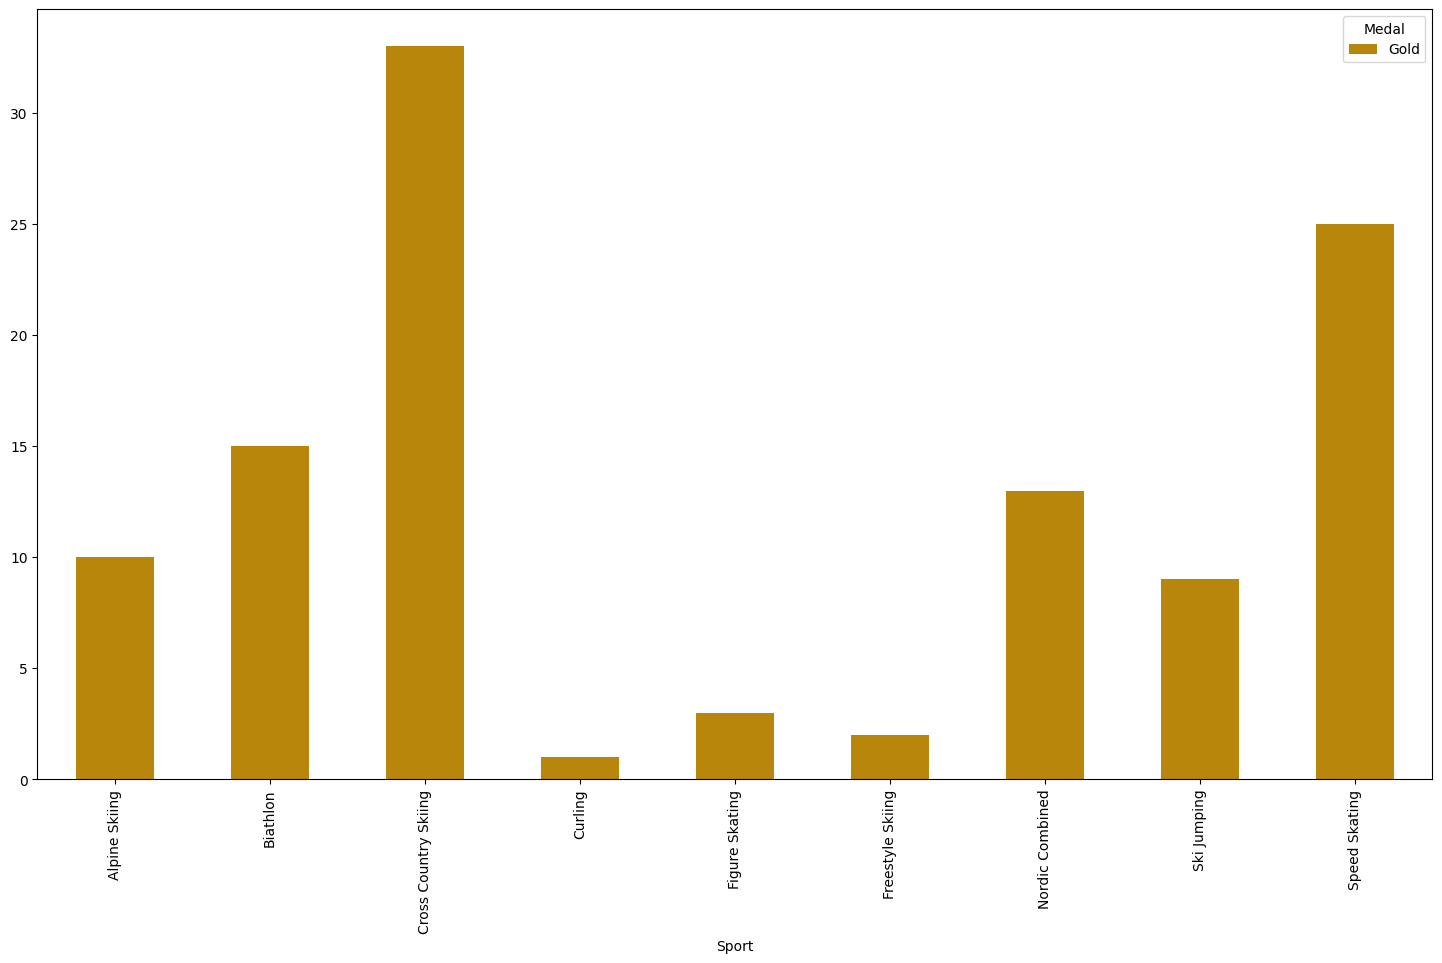

In [19]:
nor=df[df['NOC']=='NOR']
nor_win=nor[nor["Season"]=='Winter']
norwin=nor_win[nor_win['Medal']=='Gold'].groupby(['Year','Sport','Event'])
norwin=norwin.first()
norwin=norwin.reset_index()
norwin['Sport'].value_counts()
medal_colors = ['darkgoldenrod', 'gold', 'silver']
pd.crosstab(norwin.Sport,norwin.Medal).plot(kind='bar',color = medal_colors,stacked=True, figsize=(18,10))

In [20]:
df.Height=df.Height/100

In [21]:
df['BMI']=df.Weight/(df.Height)**2

In [22]:
df.BMI

0         24.691358
1         20.761246
2         22.997319
3         22.997319
4         23.959094
            ...    
271111    27.776911
271112    19.047004
271113    19.047004
271114    28.049671
271115    28.049671
Name: BMI, Length: 269731, dtype: float64

In [23]:
df.drop(columns=['Height','Weight'],inplace=True)

In [24]:
df['Sex']=df.Sex.replace({'M':0,'F':1})

In [44]:
df['Medal']=df.Medal.replace({'no_medal':0,'Gold':1,'Silver':2,'Bronze':3})

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
label_encoder = LabelEncoder()

In [28]:
team=df.Team
df['Team_encode']=label_encoder.fit_transform(team)

In [29]:
print("Mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

Mapping: {'30. Februar': 0, 'A North American Team': 1, 'Acipactli': 2, 'Acturus': 3, 'Afghanistan': 4, 'Akatonbo': 5, 'Alain IV': 6, 'Albania': 7, 'Alcaid': 8, 'Alcyon-6': 9, 'Alcyon-7': 10, 'Aldebaran': 11, 'Aldebaran II': 12, 'Aletta': 13, 'Algeria': 14, 'Ali-Baba II': 15, 'Ali-Baba IV': 16, 'Ali-Baba IX': 17, 'Ali-Baba VI': 18, 'Allegro': 19, 'Almaz': 20, 'Aloha II': 21, 'Amateur Athletic Association': 22, 'American Samoa': 23, 'Amolgavar': 24, 'Amstel Amsterdam': 25, 'Amulet-3': 26, 'Amulet-7': 27, 'Ancora': 28, 'Andorinha': 29, 'Andorra': 30, 'Andromeda': 31, 'Angelita': 32, 'Angerburg': 33, 'Angola': 34, 'Anitra': 35, 'Antares': 36, 'Antigua and Barbuda': 37, 'Antwerpia V': 38, 'Apache': 39, 'Aphrodite': 40, 'Arcturus': 41, 'Ardilla': 42, 'Aretusa': 43, 'Argentina': 44, 'Argentina-1': 45, 'Argentina-2': 46, 'Argeste': 47, 'Argo II': 48, 'Argonaut Rowing Club': 49, 'Argus': 50, 'Ariel': 51, 'Ariette-10': 52, 'Ariette-8': 53, 'Armenia': 54, 'Aruba': 55, 'Aschenbrodel': 56, 'Astrid

In [117]:
noc=df.NOC
df['NOC_encode']=label_encoder.fit_transform(noc)

In [118]:
print("Mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

Mapping: {'AFG': 0, 'AHO': 1, 'ALB': 2, 'ALG': 3, 'AND': 4, 'ANG': 5, 'ANT': 6, 'ANZ': 7, 'ARG': 8, 'ARM': 9, 'ARU': 10, 'ASA': 11, 'AUS': 12, 'AUT': 13, 'AZE': 14, 'BAH': 15, 'BAN': 16, 'BAR': 17, 'BDI': 18, 'BEL': 19, 'BEN': 20, 'BER': 21, 'BHU': 22, 'BIH': 23, 'BIZ': 24, 'BLR': 25, 'BOH': 26, 'BOL': 27, 'BOT': 28, 'BRA': 29, 'BRN': 30, 'BRU': 31, 'BUL': 32, 'BUR': 33, 'CAF': 34, 'CAM': 35, 'CAN': 36, 'CAY': 37, 'CGO': 38, 'CHA': 39, 'CHI': 40, 'CHN': 41, 'CIV': 42, 'CMR': 43, 'COD': 44, 'COK': 45, 'COL': 46, 'COM': 47, 'CPV': 48, 'CRC': 49, 'CRO': 50, 'CRT': 51, 'CUB': 52, 'CYP': 53, 'CZE': 54, 'DEN': 55, 'DJI': 56, 'DMA': 57, 'DOM': 58, 'ECU': 59, 'EGY': 60, 'ERI': 61, 'ESA': 62, 'ESP': 63, 'EST': 64, 'ETH': 65, 'EUN': 66, 'FIJ': 67, 'FIN': 68, 'FRA': 69, 'FRG': 70, 'FSM': 71, 'GAB': 72, 'GAM': 73, 'GBR': 74, 'GBS': 75, 'GDR': 76, 'GEO': 77, 'GEQ': 78, 'GER': 79, 'GHA': 80, 'GRE': 81, 'GRN': 82, 'GUA': 83, 'GUI': 84, 'GUM': 85, 'GUY': 86, 'HAI': 87, 'HKG': 88, 'HON': 89, 'HUN': 90,

In [31]:
df['Season']=df.Season.replace({'Summer':0,'Winter':1})

In [32]:
df['City_Encoded'] = label_encoder.fit_transform(df['City'])

In [33]:
print("Mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

Mapping: {'Albertville': 0, 'Amsterdam': 1, 'Antwerpen': 2, 'Athina': 3, 'Atlanta': 4, 'Barcelona': 5, 'Beijing': 6, 'Berlin': 7, 'Calgary': 8, 'Chamonix': 9, "Cortina d'Ampezzo": 10, 'Garmisch-Partenkirchen': 11, 'Grenoble': 12, 'Helsinki': 13, 'Innsbruck': 14, 'Lake Placid': 15, 'Lillehammer': 16, 'London': 17, 'Los Angeles': 18, 'Melbourne': 19, 'Mexico City': 20, 'Montreal': 21, 'Moskva': 22, 'Munich': 23, 'Nagano': 24, 'Oslo': 25, 'Paris': 26, 'Rio de Janeiro': 27, 'Roma': 28, 'Salt Lake City': 29, 'Sankt Moritz': 30, 'Sapporo': 31, 'Sarajevo': 32, 'Seoul': 33, 'Sochi': 34, 'Squaw Valley': 35, 'St. Louis': 36, 'Stockholm': 37, 'Sydney': 38, 'Tokyo': 39, 'Torino': 40, 'Vancouver': 41}


In [34]:
df['Sport_Encoded'] = label_encoder.fit_transform(df['Sport'])

In [35]:
print("Mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

Mapping: {'Aeronautics': 0, 'Alpine Skiing': 1, 'Alpinism': 2, 'Archery': 3, 'Art Competitions': 4, 'Athletics': 5, 'Badminton': 6, 'Baseball': 7, 'Basketball': 8, 'Basque Pelota': 9, 'Beach Volleyball': 10, 'Biathlon': 11, 'Bobsleigh': 12, 'Boxing': 13, 'Canoeing': 14, 'Cricket': 15, 'Croquet': 16, 'Cross Country Skiing': 17, 'Curling': 18, 'Cycling': 19, 'Diving': 20, 'Equestrianism': 21, 'Fencing': 22, 'Figure Skating': 23, 'Football': 24, 'Freestyle Skiing': 25, 'Golf': 26, 'Gymnastics': 27, 'Handball': 28, 'Hockey': 29, 'Ice Hockey': 30, 'Jeu De Paume': 31, 'Judo': 32, 'Lacrosse': 33, 'Luge': 34, 'Military Ski Patrol': 35, 'Modern Pentathlon': 36, 'Motorboating': 37, 'Nordic Combined': 38, 'Polo': 39, 'Racquets': 40, 'Rhythmic Gymnastics': 41, 'Roque': 42, 'Rowing': 43, 'Rugby': 44, 'Rugby Sevens': 45, 'Sailing': 46, 'Shooting': 47, 'Short Track Speed Skating': 48, 'Skeleton': 49, 'Ski Jumping': 50, 'Snowboarding': 51, 'Softball': 52, 'Speed Skating': 53, 'Swimming': 54, 'Synchron

In [36]:
df['Event_Encoded'] = label_encoder.fit_transform(df['Event'])

In [37]:
print("Mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

Mapping: {'Aeronautics Mixed Aeronautics': 0, "Alpine Skiing Men's Combined": 1, "Alpine Skiing Men's Downhill": 2, "Alpine Skiing Men's Giant Slalom": 3, "Alpine Skiing Men's Slalom": 4, "Alpine Skiing Men's Super G": 5, "Alpine Skiing Women's Combined": 6, "Alpine Skiing Women's Downhill": 7, "Alpine Skiing Women's Giant Slalom": 8, "Alpine Skiing Women's Slalom": 9, "Alpine Skiing Women's Super G": 10, 'Alpinism Mixed Alpinism': 11, "Archery Men's Au Chapelet, 33 metres": 12, "Archery Men's Au Chapelet, 50 metres": 13, "Archery Men's Au Cordon Dore, 33 metres": 14, "Archery Men's Au Cordon Dore, 50 metres": 15, "Archery Men's Championnat Du Monde": 16, "Archery Men's Continental Style": 17, "Archery Men's Double American Round": 18, "Archery Men's Double York Round": 19, "Archery Men's Individual": 20, "Archery Men's Pole Archery, Large Birds, Individual": 21, "Archery Men's Pole Archery, Large Birds, Team": 22, "Archery Men's Pole Archery, Small Birds, Individual": 23, "Archery Men

In [120]:
X=df.drop(['ID','Name','Team','NOC','NOC_encode','Games','City','Sport','Event','Medal'],axis=1)
y=df.Medal

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [123]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\DELL\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [124]:
model.score(X_test,y_test)

0.8548760820805605

In [125]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [126]:
classifier.score(X_test,y_test)

0.8728010825439784

In [136]:
from sklearn.ensemble import RandomForestClassifier  
classifier1= RandomForestClassifier(n_estimators= 22, criterion="entropy")  
classifier1.fit(X_train,y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=22)

In [137]:
classifier1.score(X_test,y_test)

0.902478358388789

In [138]:
from sklearn.neighbors import KNeighborsClassifier  
classifier2= KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=9)  
classifier2.fit(X_train,y_train)  

KNeighborsClassifier(n_neighbors=10, p=9)

In [139]:
classifier2.score(X_test,y_test)

0.8812352864848834

In [140]:
from sklearn.naive_bayes import GaussianNB  
classifier3= GaussianNB()  
classifier3.fit(X_train,y_train)  

GaussianNB()

In [141]:
classifier3.score(X_test,y_test)

0.8545238845533579

In [142]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=7)
clf.fit(X_train,y_train)

C:\Users\DELL\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(max_iter=7)

In [143]:
clf.score(X_test,y_test)

0.5109830018351345

In [145]:
import numpy as np
#input_data=(0,30,1998,1,28.049671,809,162,24,12,177)
input_data=(0,34.0,1900,0,22.997319,278,26,61,709)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier1.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('No Medal')
elif (prediction[0]==1):
  print('Gold Medal')
elif (prediction[0]==2):
    print('Silver Medal')
else:
    print("Bronze Medal")


[1.]
Gold Medal


C:\Users\DELL\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [146]:
X

,Sex,Age,Year,Season,BMI,Team_encode,City_Encoded,Sport_Encoded,Event_Encoded
0,0,24.0,1992,0,24.691358,198,5,8,159
1,0,23.0,2012,0,20.761246,198,17,32,397
2,0,24.0,1920,0,22.997319,273,2,24,348
3,0,34.0,1900,0,22.997319,278,26,61,709
4,1,21.0,1988,1,23.959094,704,8,53,622
...,...,...,...,...,...,...,...,...,...
271111,0,29.0,1976,1,27.776911,810,14,34,414
271112,0,27.0,2014,1,19.047004,809,34,50,594
271113,0,27.0,2014,1,19.047004,809,34,50,595
271114,0,30.0,1998,1,28.049671,809,24,12,177


In [108]:
import pickle

In [147]:
op=open("oly1.pkl","wb")
pickle.dump(classifier1,op)
op.close()

In [114]:
df.Age.max()

97.0

In [116]:
df.BMI.max()

63.90157962315983

In [119]:
X.columns

Index(['Sex', 'Age', 'Year', 'Season', 'BMI', 'Team_encode', 'NOC_encode',
       'City_Encoded', 'Sport_Encoded', 'Event_Encoded'],
      dtype='object')